## 1. Collect or Load Data

In [3]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## 2. Basic Check

In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.describe(include='object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 3. EDA

### i. Univariate Analysis

#### a. Numerical Features

In [7]:
num_cols = df.select_dtypes('number')
num_cols

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


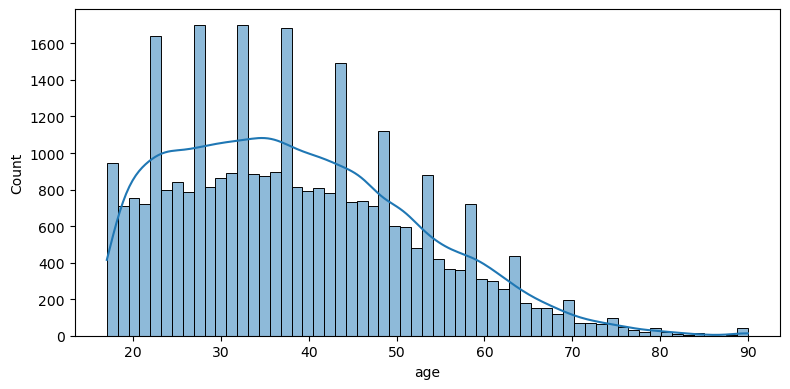

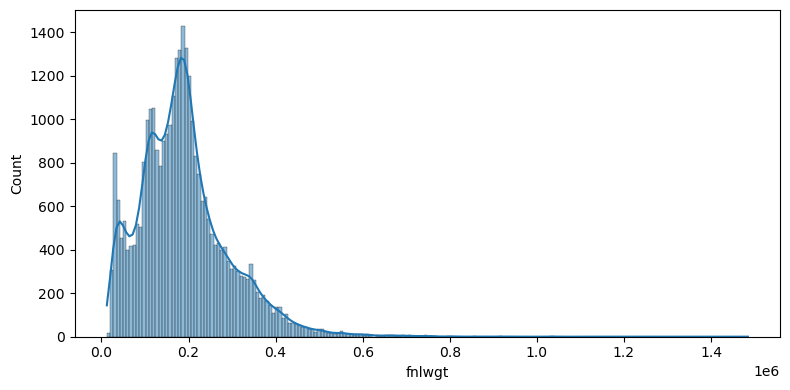

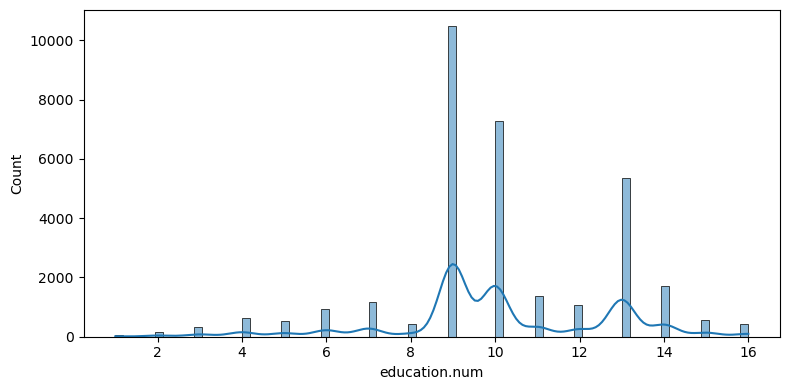

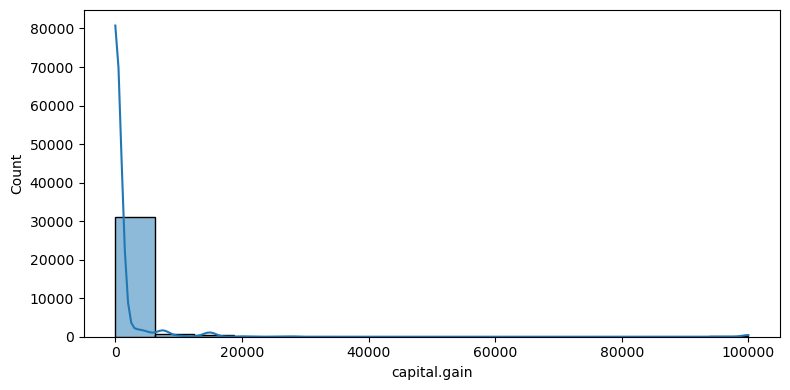

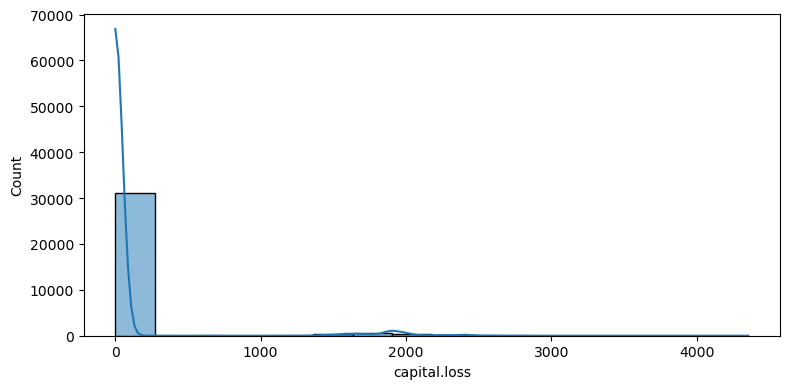

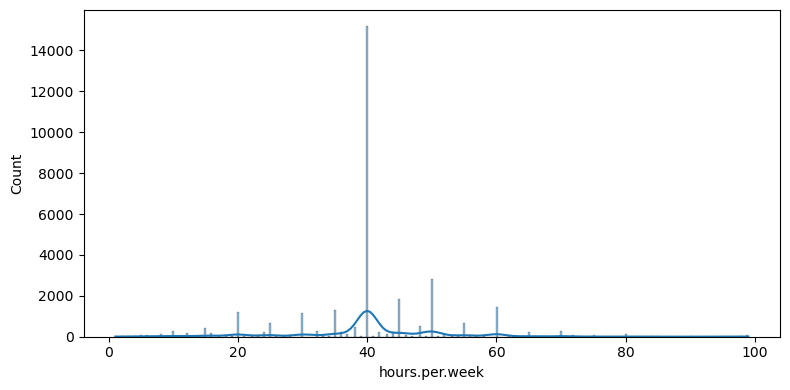

In [7]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(x=col, data=df, kde=True)
    plt.tight_layout()
    plt.show()

#### b. Categorical Feature Analysis

In [8]:
cat_cols = df.select_dtypes('object')
cat_cols

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


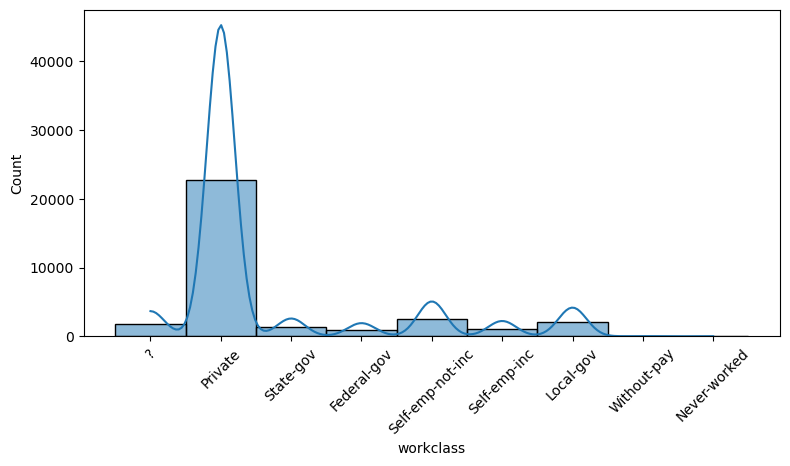

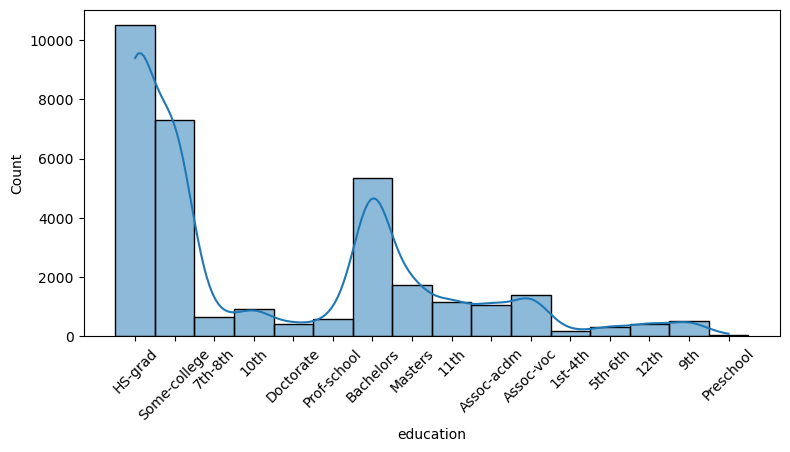

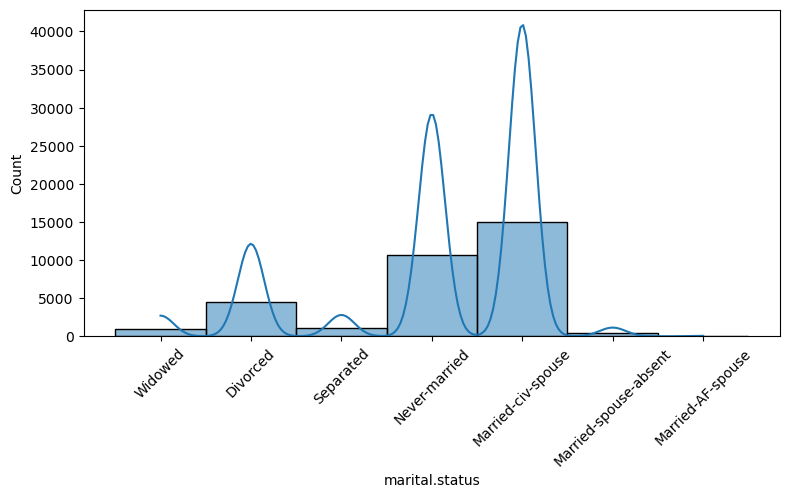

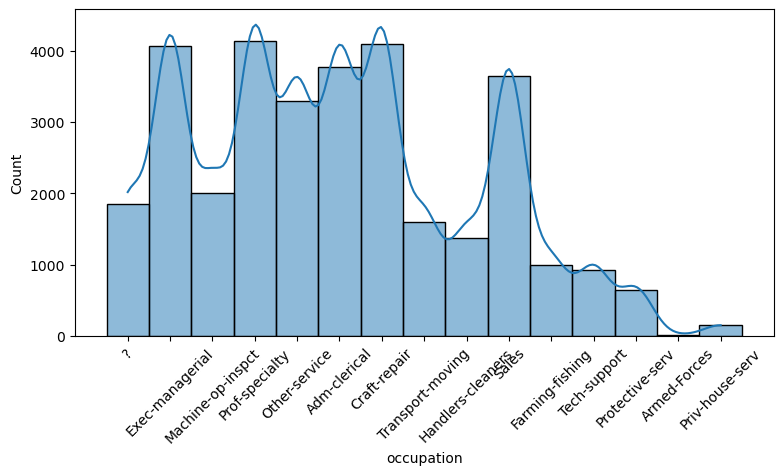

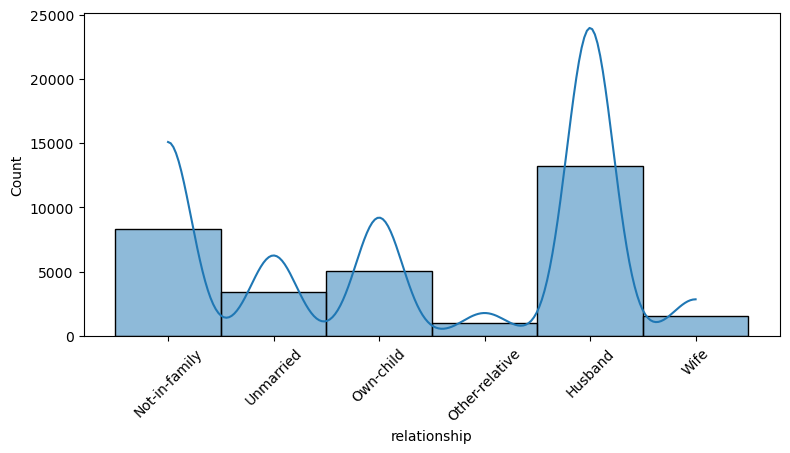

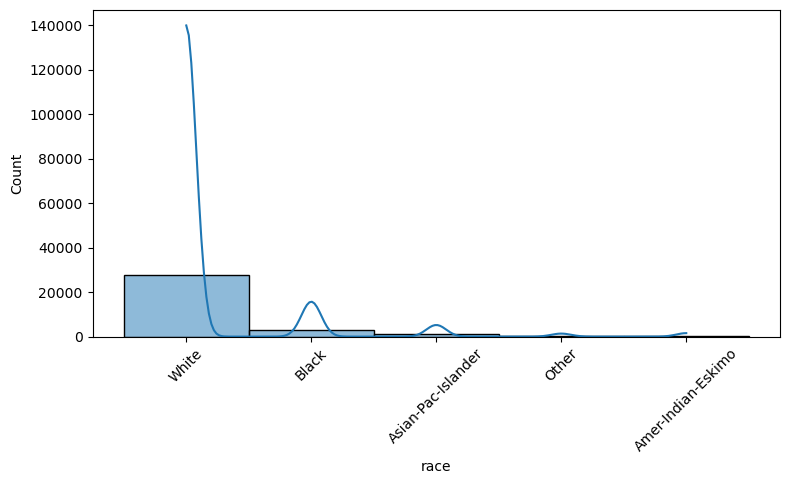

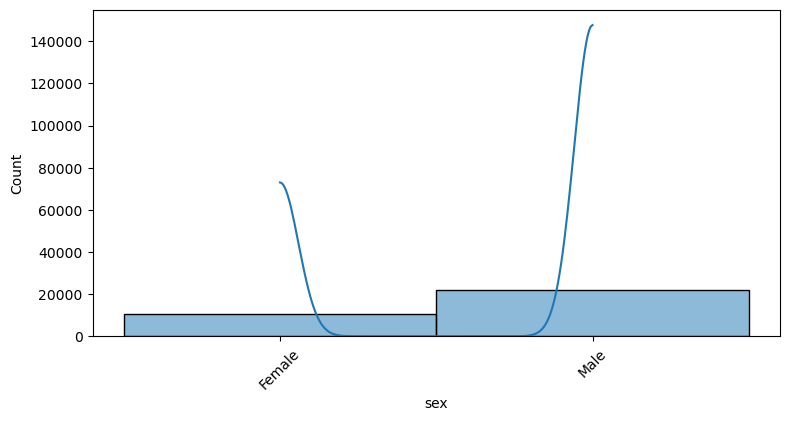

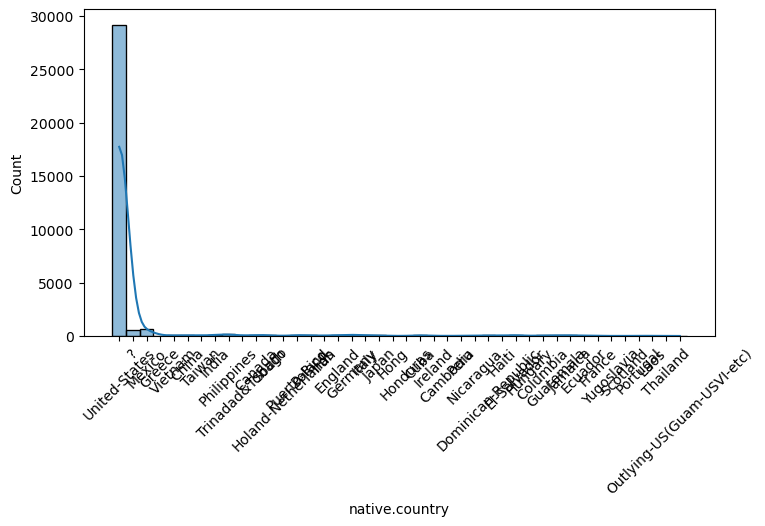

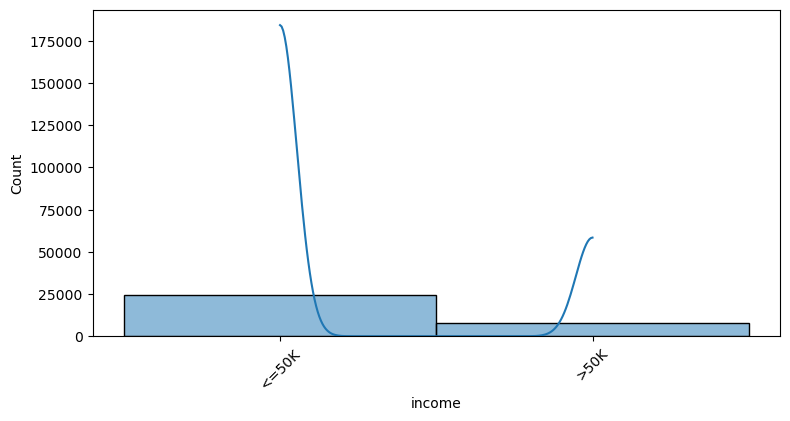

In [9]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(x=col, data=df, kde=True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

### ii. Bivariate Analysis

#### a. Numeric Columns

In [10]:
# Converting Output column into Numeric
df['income_numeric'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [11]:
df.groupby('education.num')['income_numeric'].mean()

education.num
1     0.000000
2     0.035714
3     0.048048
4     0.061920
5     0.052529
6     0.066452
7     0.051064
8     0.076212
9     0.159509
10    0.190235
11    0.261216
12    0.248360
13    0.414753
14    0.556587
15    0.734375
16    0.740920
Name: income_numeric, dtype: float64

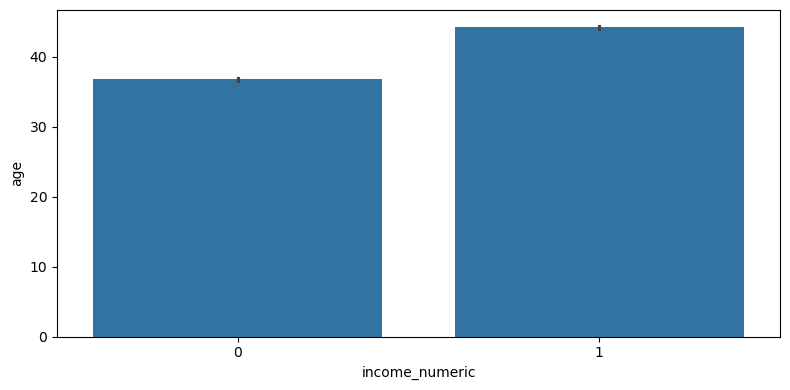

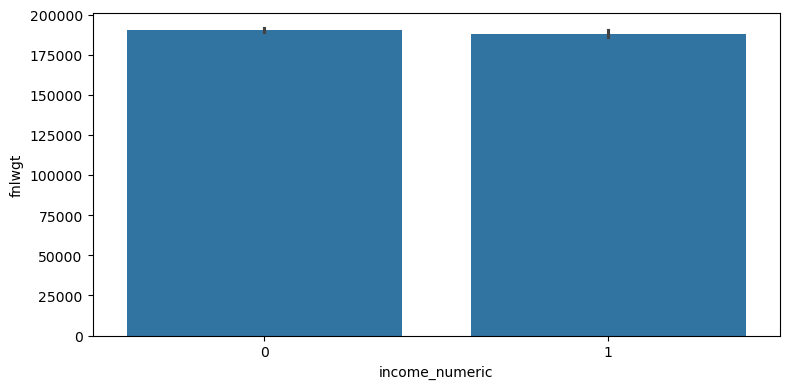

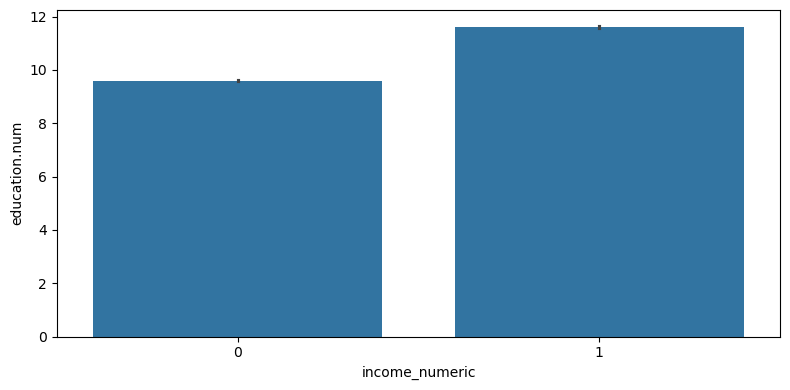

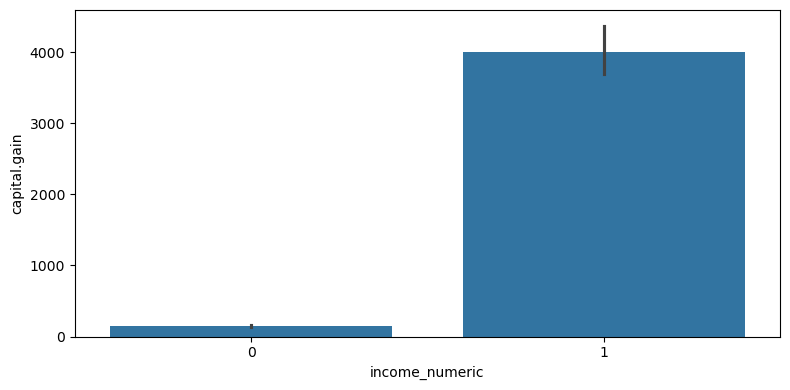

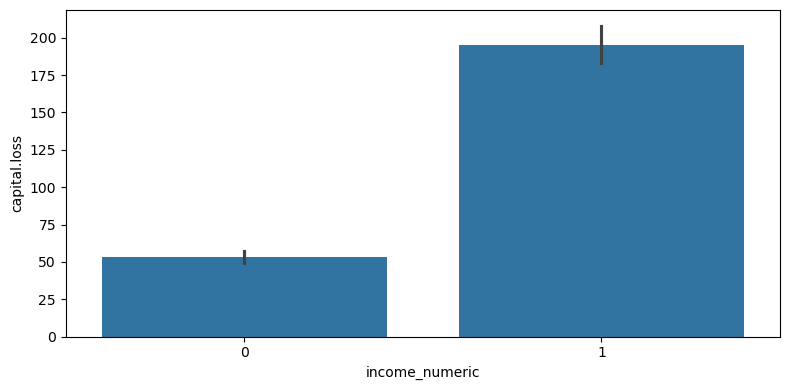

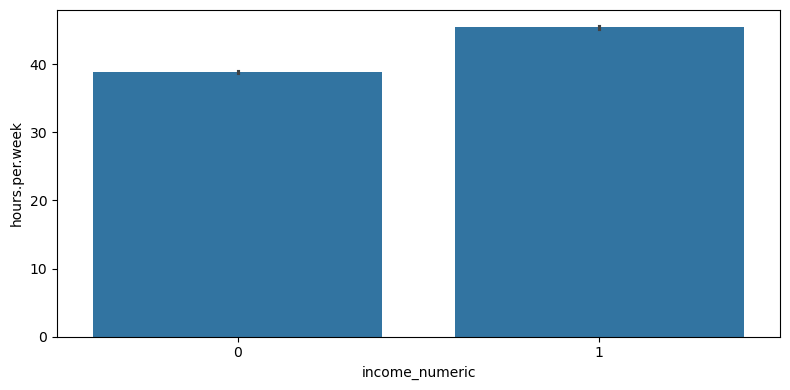

In [12]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(x=df['income_numeric'], y=col, data=df)
    plt.tight_layout()
    plt.show()

#### b. Categorical Features

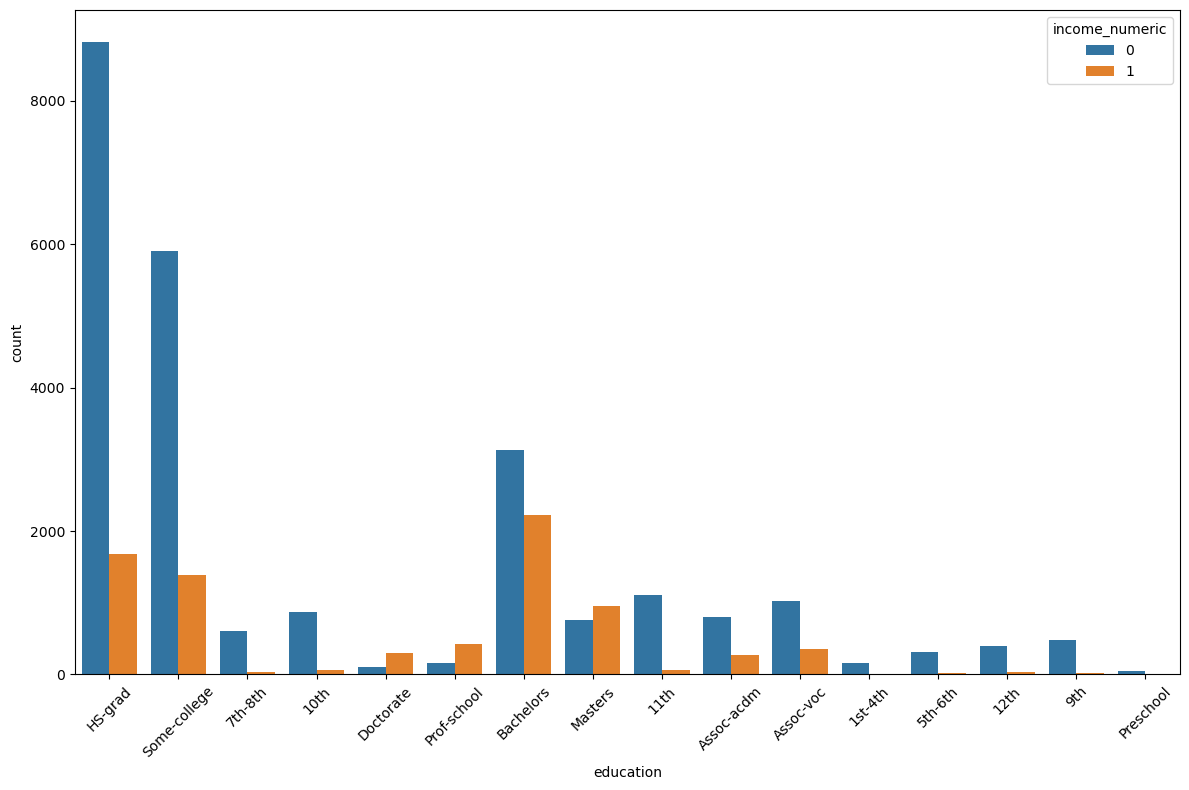

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['education'], hue=df['income_numeric'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df['income_numeric'].value_counts()

income_numeric
0    24720
1     7841
Name: count, dtype: int64

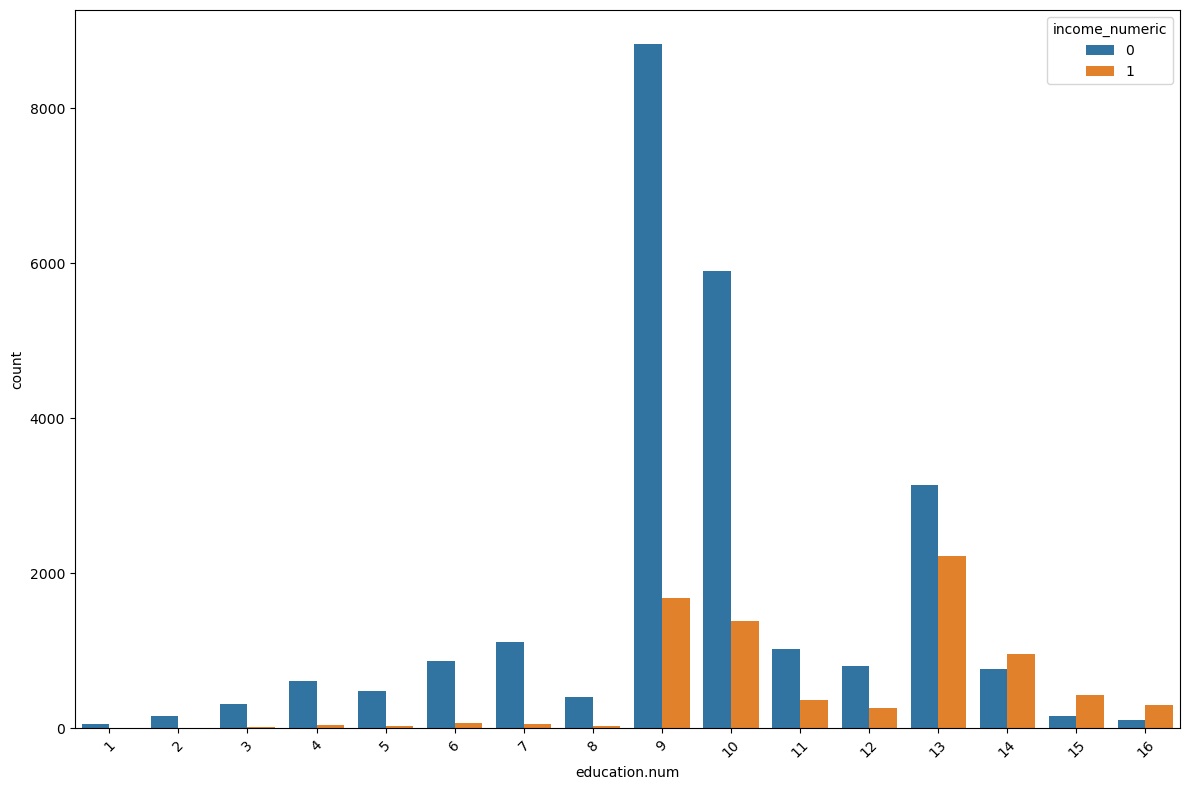

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['education.num'], hue=df['income_numeric'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### iii. Multivariate Analysis

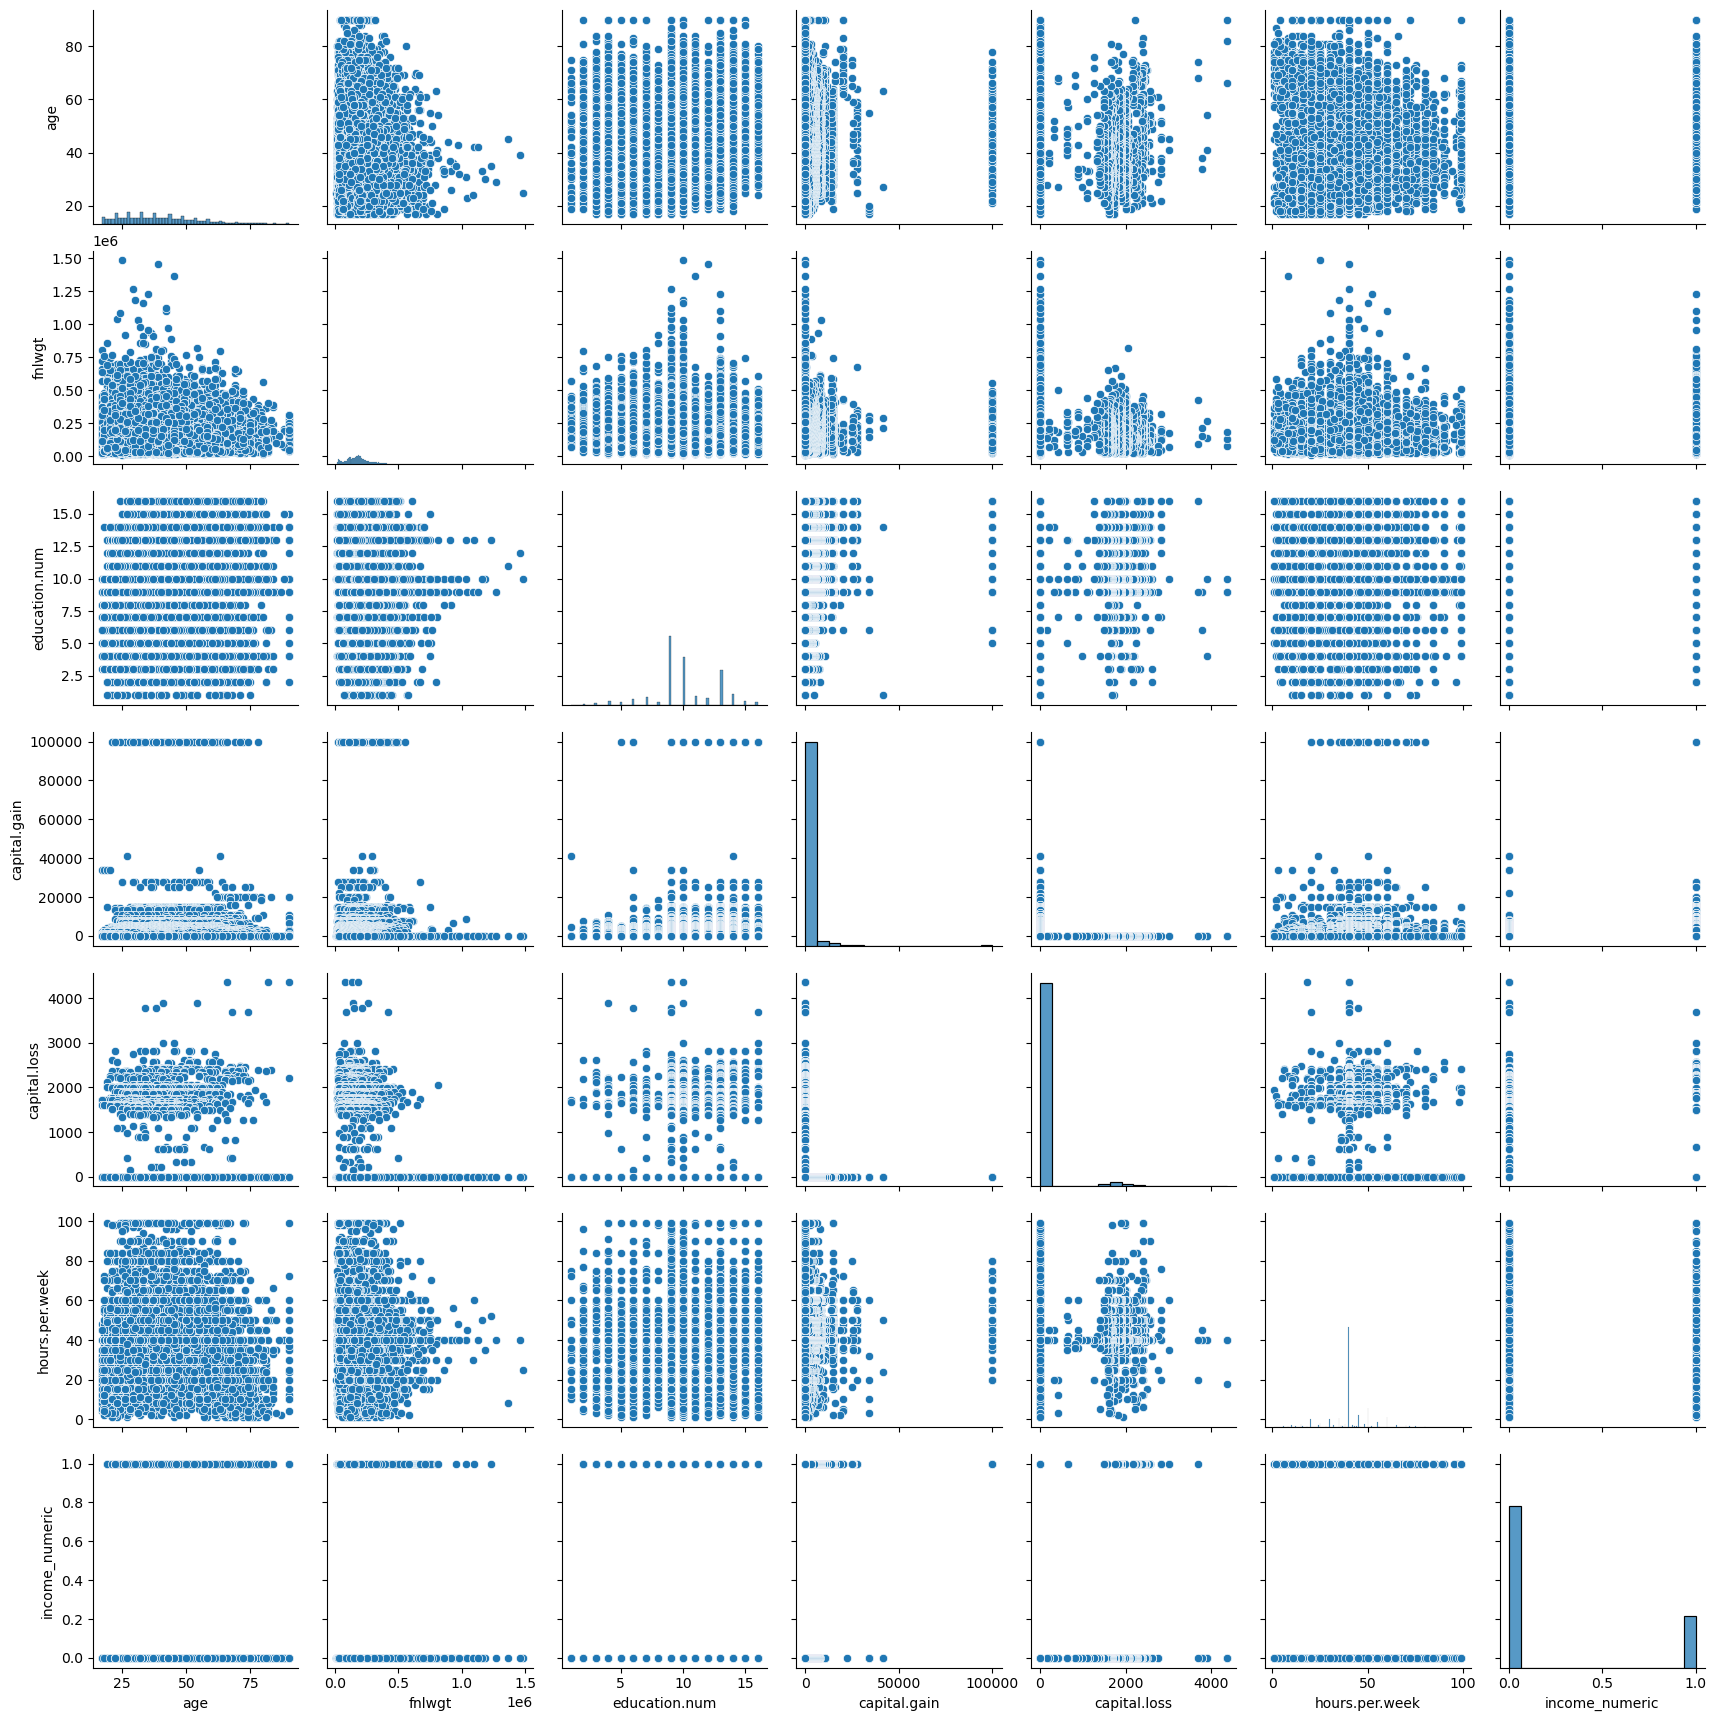

In [17]:
sns.pairplot(num_cols)

## 4. Data Preprocessing

### i. Handling Null values/Outliers

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
income_numeric    0
dtype: int64

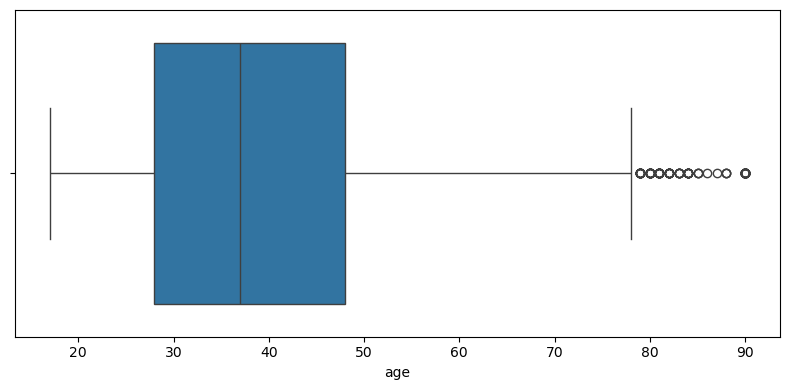

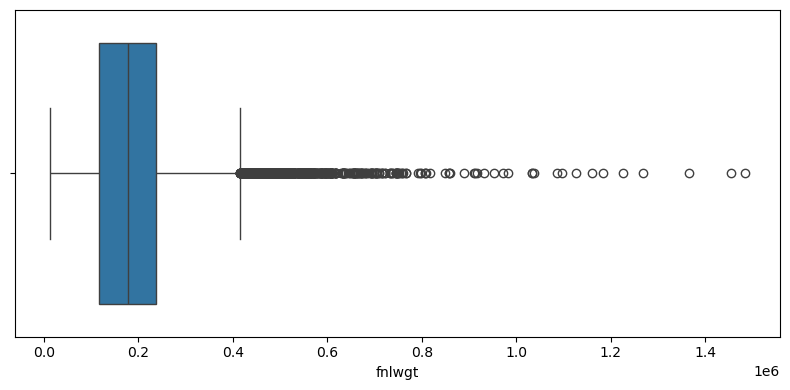

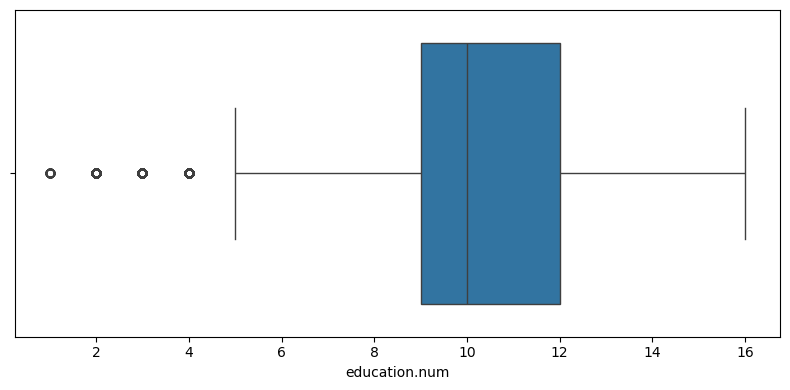

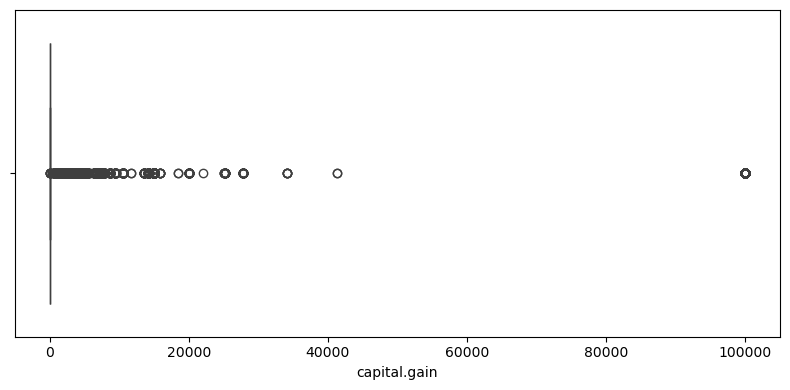

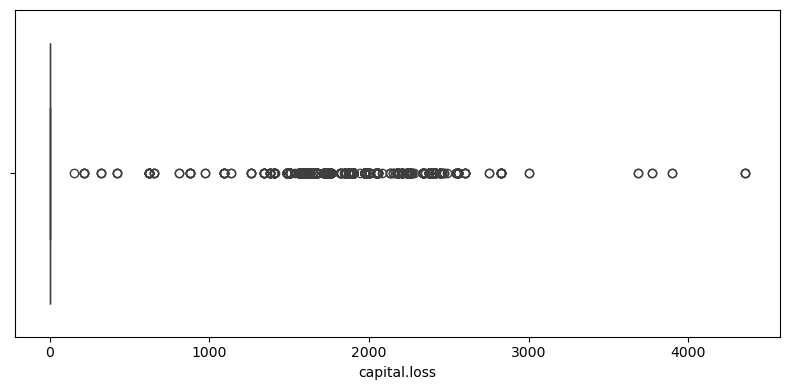

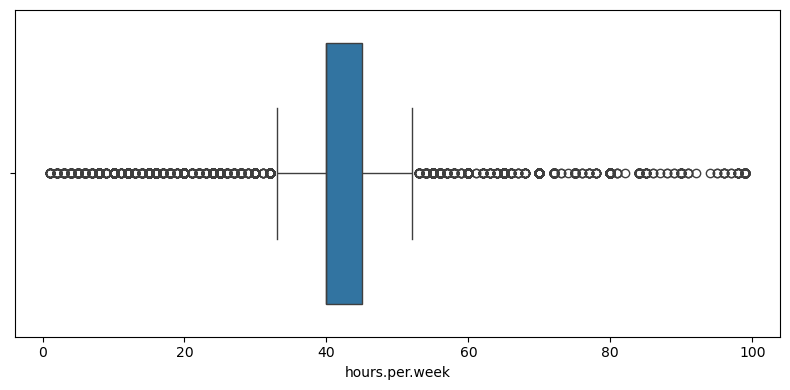

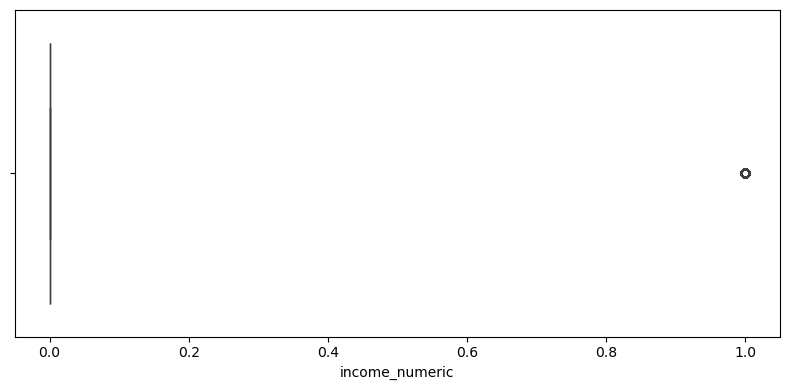

In [19]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, data=df)
    plt.tight_layout()
    plt.show()

In [15]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    df = df[(df[col] >= lb) & (df[col] <= ub)]
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_numeric
4232,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
4233,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4234,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4235,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
4237,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1


In [16]:
df['income_numeric'].value_counts()

income_numeric
0    14982
1     4022
Name: count, dtype: int64

### ii. Scaling

In [17]:
X = df.select_dtypes('number')
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_numeric
4232,38,215646,9,0,0,40,0
4233,53,234721,7,0,0,40,0
4234,28,338409,13,0,0,40,0
4235,37,284582,14,0,0,40,0
4237,52,209642,9,0,0,45,1
...,...,...,...,...,...,...,...
32555,53,321865,14,0,0,40,1
32556,22,310152,10,0,0,40,0
32557,27,257302,12,0,0,38,0
32558,40,154374,9,0,0,40,1


In [18]:
X.drop('income_numeric', axis=1, inplace=True)
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
4232,38,215646,9,0,0,40
4233,53,234721,7,0,0,40
4234,28,338409,13,0,0,40
4235,37,284582,14,0,0,40
4237,52,209642,9,0,0,45
...,...,...,...,...,...,...
32555,53,321865,14,0,0,40
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled

array([[-0.00408275,  0.40086858, -0.57914177,  0.        ,  0.        ,
        -0.37231992],
       [ 1.24332328,  0.61986596, -1.5085072 ,  0.        ,  0.        ,
        -0.37231992],
       [-0.83568678,  1.81029324,  1.2795891 ,  0.        ,  0.        ,
        -0.37231992],
       ...,
       [-0.91884718,  0.87911523,  0.81490638,  0.        ,  0.        ,
        -0.87863984],
       [ 0.16223805, -0.3025866 , -0.57914177,  0.        ,  0.        ,
        -0.37231992],
       [ 1.65912529, -0.33087544, -0.57914177,  0.        ,  0.        ,
        -0.37231992]])

In [20]:
df_scaled = pd.DataFrame(df_scaled, columns = X.columns)
df_scaled

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,-0.004083,0.400869,-0.579142,0.0,0.0,-0.37232
1,1.243323,0.619866,-1.508507,0.0,0.0,-0.37232
2,-0.835687,1.810293,1.279589,0.0,0.0,-0.37232
3,-0.087243,1.192313,1.744272,0.0,0.0,-0.37232
4,1.160163,0.331938,-0.579142,0.0,0.0,0.89348
...,...,...,...,...,...,...
18999,1.243323,1.620354,1.744272,0.0,0.0,-0.37232
19000,-1.334649,1.485879,-0.114459,0.0,0.0,-0.37232
19001,-0.918847,0.879115,0.814906,0.0,0.0,-0.87864
19002,0.162238,-0.302587,-0.579142,0.0,0.0,-0.37232


In [21]:
cat_cols = df.select_dtypes('object').columns

In [22]:
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [23]:
df_scaled = pd.concat([df_scaled, df[cat_cols].reset_index(drop=True)], axis=1)
df_scaled

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,-0.004083,0.400869,-0.579142,0.0,0.0,-0.37232,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
1,1.243323,0.619866,-1.508507,0.0,0.0,-0.37232,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
2,-0.835687,1.810293,1.279589,0.0,0.0,-0.37232,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
3,-0.087243,1.192313,1.744272,0.0,0.0,-0.37232,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
4,1.160163,0.331938,-0.579142,0.0,0.0,0.89348,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,1.243323,1.620354,1.744272,0.0,0.0,-0.37232,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
19000,-1.334649,1.485879,-0.114459,0.0,0.0,-0.37232,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
19001,-0.918847,0.879115,0.814906,0.0,0.0,-0.87864,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
19002,0.162238,-0.302587,-0.579142,0.0,0.0,-0.37232,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K


In [24]:
df_scaled = pd.concat([df_scaled, df['income_numeric'].reset_index(drop=True)], axis=1)
df_scaled

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,income_numeric
0,-0.004083,0.400869,-0.579142,0.0,0.0,-0.37232,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0
1,1.243323,0.619866,-1.508507,0.0,0.0,-0.37232,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0
2,-0.835687,1.810293,1.279589,0.0,0.0,-0.37232,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0
3,-0.087243,1.192313,1.744272,0.0,0.0,-0.37232,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K,0
4,1.160163,0.331938,-0.579142,0.0,0.0,0.89348,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,1.243323,1.620354,1.744272,0.0,0.0,-0.37232,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K,1
19000,-1.334649,1.485879,-0.114459,0.0,0.0,-0.37232,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K,0
19001,-0.918847,0.879115,0.814906,0.0,0.0,-0.87864,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,0
19002,0.162238,-0.302587,-0.579142,0.0,0.0,-0.37232,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,1


In [25]:
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [26]:
for col in df[cat_cols]:
    print(df[col].value_counts())
    print("-----------------------------------------")

workclass
Private             13837
Local-gov            1333
Self-emp-not-inc     1105
State-gov             830
?                     750
Federal-gov           665
Self-emp-inc          480
Never-worked            2
Without-pay             2
Name: count, dtype: int64
-----------------------------------------
education
HS-grad         6948
Some-college    4255
Bachelors       3213
Masters          940
Assoc-voc        915
Assoc-acdm       653
11th             580
10th             532
9th              344
12th             242
Prof-school      211
Doctorate        171
Name: count, dtype: int64
-----------------------------------------
marital.status
Married-civ-spouse       8595
Never-married            6091
Divorced                 2965
Separated                 657
Widowed                   447
Married-spouse-absent     237
Married-AF-spouse          12
Name: count, dtype: int64
-----------------------------------------
occupation
Craft-repair         2819
Adm-clerical         2580
Ex

In [27]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Step 1: Replace '?' with NaN
df_scaled.replace('?', np.nan, inplace=True)

# Step 2: Drop rows with any missing values
df_scaled.dropna(inplace=True)

# Step 3: Ordinal encode 'education'
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                   '10th', '11th', '12th', 'HS-grad', 'Some-college',
                   'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
                   'Prof-school', 'Doctorate']

ord_enc = OrdinalEncoder(categories=[education_order])
df_scaled['education_encoded'] = ord_enc.fit_transform(df_scaled[['education']])

# Step 4: Label encode 'sex'
df_scaled['sex_encoded'] = LabelEncoder().fit_transform(df_scaled['sex'])

# Step 5: OneHotEncode other nominal categorical columns
onehot_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race']
df_scaled = pd.get_dummies(df, columns=onehot_cols, drop_first=True, dtype=int)

# Step 6: Drop high-cardinality or unused original columns
df_scaled.drop(['native.country', 'education', 'sex'], axis=1, inplace=True)

# Done: df is now fully encoded and clean
df_scaled

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,income_numeric,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
4232,38,215646,9,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4233,53,234721,7,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4234,28,338409,13,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4235,37,284582,14,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4237,52,209642,9,0,0,45,>50K,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,321865,14,0,0,40,>50K,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32556,22,310152,10,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
32557,27,257302,12,0,0,38,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
32558,40,154374,9,0,0,40,>50K,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# Convert all boolean columns to 0/1 integers
# bool_cols = df_scaled.select_dtypes(include='bool').columns
# df_scaled[bool_cols] = df_scaled[bool_cols].astype(int)
df_scaled.drop('income', axis=1, inplace=True)
df_scaled

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_numeric,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
4232,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4233,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4234,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4235,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4237,52,209642,9,0,0,45,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,321865,14,0,0,40,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32556,22,310152,10,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
32557,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
32558,40,154374,9,0,0,40,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
df_scaled = df_scaled.reset_index(drop=True)
df_scaled

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_numeric,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,52,209642,9,0,0,45,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,53,321865,14,0,0,40,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19000,22,310152,10,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
19001,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
19002,40,154374,9,0,0,40,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 5. Feature Selection

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:

# Correlation matrix
corr_matrix = df_scaled.corr().abs()

# Target column correlation
target_corr = corr_matrix['income_numeric']

# Drop target from feature-feature matrix to avoid confusion
corr_matrix_features = corr_matrix.drop('income_numeric').drop('income_numeric', axis=1)

# Upper triangle to avoid duplicates
upper = corr_matrix_features.where(
    np.triu(np.ones(corr_matrix_features.shape), k=1).astype(bool)
)

# Threshold for high correlation
threshold = 0.9

# Print highly correlated feature pairs with their correlation to the target
print("Highly Correlated Feature Pairs (Correlation > 0.9):\n")
for col1 in upper.columns:
    for col2 in upper.columns:
        if upper.loc[col1, col2] > threshold:
            print(f"{col1} and {col2} => Corr: {upper.loc[col1, col2]:.2f} | "
                  f"{col1} vs income_numeric: {target_corr[col1]:.2f}, {col2} vs income_numeric: {target_corr[col2]:.2f}")
            print('-------------------------------------------------------------------------------------------------')

Highly Correlated Feature Pairs (Correlation > 0.9):



## 6. Feature Extraction

In [31]:
X = df_scaled.drop('income_numeric', axis=1)
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,37,284582,14,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,52,209642,9,0,0,45,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,53,321865,14,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19000,22,310152,10,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
19001,27,257302,12,0,0,38,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
19002,40,154374,9,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


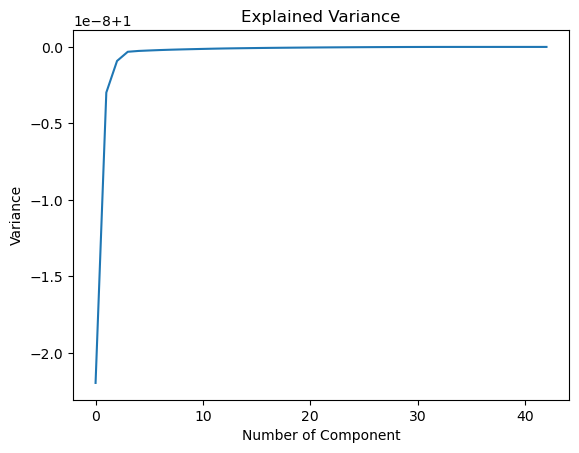

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Component')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()

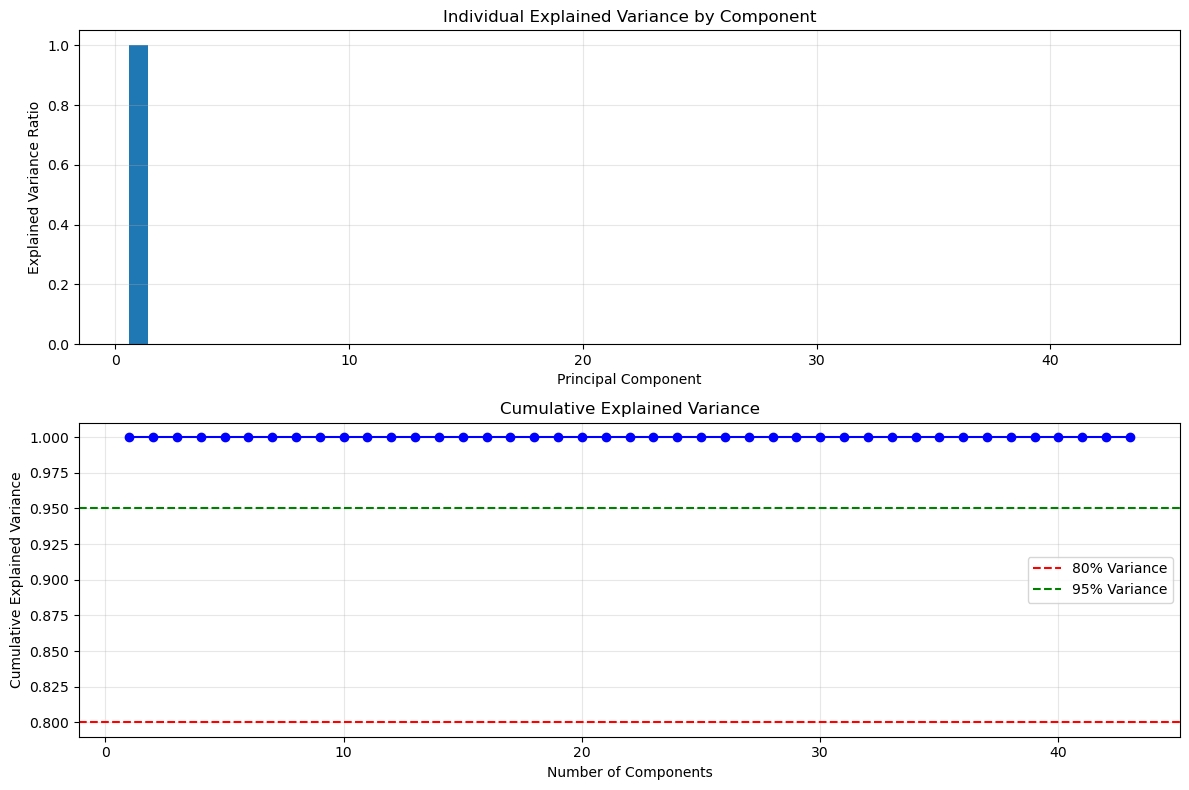

First 10 components explained variance:
PC1: 1.0000 (100.00%)
PC2: 0.0000 (0.00%)
PC3: 0.0000 (0.00%)
PC4: 0.0000 (0.00%)
PC5: 0.0000 (0.00%)
PC6: 0.0000 (0.00%)
PC7: 0.0000 (0.00%)
PC8: 0.0000 (0.00%)
PC9: 0.0000 (0.00%)
PC10: 0.0000 (0.00%)

Total variance explained by first 10 components: 1.0000 (100.00%)


In [33]:
# PCA apply karo
pca = PCA()
pc = pca.fit_transform(X)  # X should be your scaled data

# Explained variance ratio (0 to 1 ke beech me)
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance (0 to 1 ke beech me)
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(12, 8))

# Individual explained variance
plt.subplot(2, 1, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance by Component')
plt.grid(True, alpha=0.3)

# Cumulative explained variance
plt.subplot(2, 1, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()

plt.tight_layout()
plt.show()

# Print first few components' variance
print("First 10 components explained variance:")
for i in range(min(10, len(explained_variance))):
    print(f"PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")

print(f"\nTotal variance explained by first 10 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")

In [34]:
pca = PCA(n_components=1)
new_data = pca.fit_transform(X)
new_data

array([[ 34916.25363153],
       [ 53991.25348377],
       [157679.25372206],
       ...,
       [ 76572.25373766],
       [-26355.74638541],
       [-28819.74656316]])

In [35]:
# column names
columns = [f'Principle Component 1']
# creating df
principle_df = pd.DataFrame(data=new_data, columns = columns)
principle_df

,Principle Component 1
0,34916.253632
1,53991.253484
2,157679.253722
3,103852.253635
4,28912.253489
...,...
18999,141135.253475
19000,129422.253785
19001,76572.253738
19002,-26355.746385


In [36]:
principle_df = pd.concat([principle_df, df_scaled['income_numeric'].reset_index(drop=True)], axis=1)
principle_df

,Principle Component 1,income_numeric
0,34916.253632,0
1,53991.253484,0
2,157679.253722,0
3,103852.253635,0
4,28912.253489,1
...,...,...
18999,141135.253475,1
19000,129422.253785,0
19001,76572.253738,0
19002,-26355.746385,1


In [37]:
principle_df['income_numeric'].value_counts()

income_numeric
0    14982
1     4022
Name: count, dtype: int64

## 7. Split the Data

In [96]:
X = principle_df.drop('income_numeric', axis=1)
X

,Principle Component 1
0,34916.253632
1,53991.253484
2,157679.253722
3,103852.253635
4,28912.253489
...,...
18999,141135.253475
19000,129422.253785
19001,76572.253738
19002,-26355.746385


In [97]:
y = principle_df[['income_numeric']]
y

,income_numeric
0,0
1,0
2,0
3,0
4,1
...,...
18999,1
19000,0
19001,0
19002,1


In [98]:
y

,income_numeric
0,0
1,0
2,0
3,0
4,1
...,...
18999,1
19000,0
19001,0
19002,1


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 8. Fit the data to the model

In [100]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [101]:
from sklearn.metrics import classification_report

# Predict on training and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Classification report on training data
print("=== Classification Report on Training Data ===")
print(classification_report(y_train, y_train_pred))

# Classification report on test data
print("=== Classification Report on Test Data ===")
print(classification_report(y_test, y_test_pred))

=== Classification Report on Training Data ===
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     11948
           1       0.00      0.00      0.00      3255

    accuracy                           0.79     15203
   macro avg       0.39      0.50      0.44     15203
weighted avg       0.62      0.79      0.69     15203

=== Classification Report on Test Data ===
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3034
           1       0.00      0.00      0.00       767

    accuracy                           0.80      3801
   macro avg       0.40      0.50      0.44      3801
weighted avg       0.64      0.80      0.71      3801



## 9. Model Evaluation

In [102]:
from sklearn.model_selection import cross_val_score

# Cross-validation (5-fold)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Results print
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.78847672 0.78847672 0.78821363 0.78821363 0.78842105]
Mean accuracy: 0.7883603483847741
Standard deviation: 0.00012150876549299363
